NAME : I. SAI PRADEEP

ROLL NO. : AI21BTECH11013

COURSE : AI2100 ( DEEP LEARNING)

ASSIGNMENT : 1

In [2]:
# Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt


1st Question:

dataset creation:


In [3]:
min=0
# max is the maximum possible x or y co-ordinate among the points we are creating
max=5
# N is the total number of points we are generating
N=2000
# offset is minimum distance between the closest different labeled points in the dataset times 0.5, it is taken 0.1 initially
offset=0.1
# data is a N*2 matrix, which contains our 2D points in it
data=np.zeros(N*2)
data=data.reshape(N, 2)
# dataP has points whose label is 1
dataP=[]
# dataN has points whose label is -1
dataN=[]
# labels contains the labels (1 or -1) of the points in the given datapoints, which is initialised to 0 
labels=np.zeros(N)

# a function which creates random points based on the given offset
def createRandPoints(offset,data,dataP,dataN,N,min,max):
  # i is an iterator, which feeds all points in the matrix data and their respective labels in the array labels
  for i in range(0,N):
    # x-> x co-ordinate of the points
    x=((max-min)*(np.random.rand()))
    # lab is a variable , that contains label of a datapoint, it is randomly given 0 or 1
    lab=np.floor(2*np.random.rand())
    data[i][0]=x
    if(lab==0):
      # assuming lab=0 is -1 label
        # y-> y co-ordinate of the points
        y=(min+(x-min)*np.random.rand())
        data[i][1]=y
        labels[i]=1
        dataP.append([x,y])
    else:
      # assuming lab=1 is 1 label
        # y-> y co-ordinate of the points
        y=(x+(max-x)*np.random.rand()+offset)
        data[i][1]=y
        labels[i]=-1
        dataN.append([x,y])
  return data,dataP,dataN        

# feeding Data Points  
data,dataP,dataN=createRandPoints(offset,data,dataP,dataN,N,min,max)

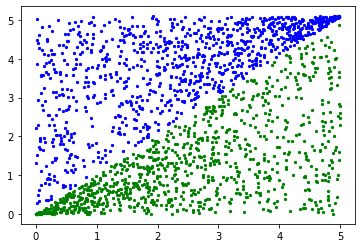

In [4]:
# Plotting the initial data
# converting data to np-array
data=np.array(data)
# converting dataP to np-array
dataP=np.array(dataP)
# converting dataN to np-array
dataN=np.array(dataN)
# Plotting the datapoints using scatter plot
# Positive Points
x=dataP[:,0]
y=dataP[:,1]
plt.scatter(x,y,color='green',s=5)
# Negative Points
x=dataN[:,0]
y=dataN[:,1]
plt.scatter(x,y,color='blue' , s=5)
plt.show()

perceptron learning algorithm 

In [5]:

# W is a parameter initialized with 0's, defining the classifier(line): W[0]*x+W[1]*y+W[2]=0
W = np.zeros(3)

# Perceptron Training Algorithm:
def perceptronTrainingAlgo(x, y, w, Maxepochs): 
  # e is an iterator, which runs Maxepochs times
    iter=0
    for e in range(Maxepochs):
      misclassified=0
      for i in range(len(x)):
        newX=np.array([x[i][0],x[i][1],1])
        # misclassified points, w is updated
        if (newX.dot(w) * y[i] <= 0):
            w = w + y[i] * newX.T
            misclassified=misclassified+1
            iter+=1
      if (misclassified==0):
        break
    return w,iter

# W => Solution, e=> no. of iterations needed for perfect separation
W,e = perceptronTrainingAlgo(data,labels, W, 10)


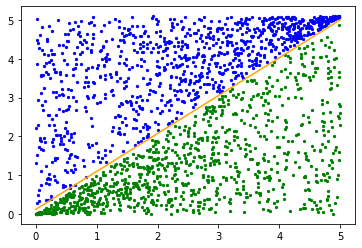

In [6]:
# Plotting the Graph, along with the classifier
x=dataP[:,0]
y=dataP[:,1]
plt.scatter(x,y,color='green',s=5)
x=dataN[:,0]
y=dataN[:,1]
plt.scatter(x,y,color='blue' , s=5)
x=np.linspace(min,max,1000)
y=-(x*W[0]+W[2])/W[1]
plt.plot(x,y,color="orange")
plt.show()


using  different gamma's and finding respective values of k, and plotting them

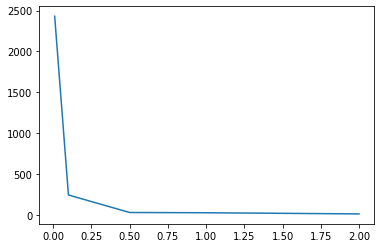

In [7]:

gamma=[0.01,0.1,0.5,1,2]
e=[0,0,0,0,0]
for i in range(0,5):
  a=0
  for j in range(0,5):
    W=[0,0,0]
    data=np.zeros(N*2)
    data=data.reshape(N, 2)
    # dataP has points whose label is 1
    dataP=[]
    # dataN has points whose label is -1
    dataN=[]
    # labels contains the labels (1 or -1) of the points in the given datapoints, which is initialised to 0 
    labels=np.zeros(N)
    data,dataP,dataN=createRandPoints(gamma[i],data,dataP,dataN,N,min,max)
    W,p=perceptronTrainingAlgo(data, labels, W, 100)
    a+=p  
  e[i]=a/5.0
plt.plot(gamma,e)
plt.show()

Analysis:

Here for differnt values of gamma( the level of separability), we can say that, the more is the value of gamma, the less is the number of epochs required to completely classify the dataset using Perceptron Learning Algorithm. The more is the distance between the closest different classified points, it becomes easy for the classifier to classify the data.

Question 2

Loss formulation


Here we are usin gthe hinge loss in the gradient descent
The gradient descent is terminated when the total loss (0-1 loss) becomez zero. 

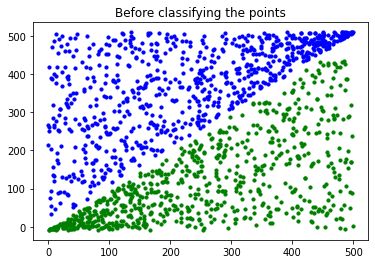

In [12]:

# A 0-1 loss function returns number of misclassified points
def Loss_ZeroOne(data,labels,N,w):
    misclassified=0
    for i in range(0,N):
        if(labels[i]==1 and  (w[0]*data[i][0]+w[1]*data[i][1]+w[2])<0):
            misclassified+=1
        elif(labels[i]==-1 and  (w[0]*data[i][0]+w[1]*data[i][1]+w[2])>=0):
            misclassified+=1    
    return misclassified

# returns maximum of two numbers
def max_find(x,y):
    if(x>=y):
        return x
    else: return y 

# computes gradient at a point(data[i]) and returns the gradient at the point
def GradientOfLossFunction(w,data,N,label,i):
        grad=[0,0,0]
        a=1-label[i]*(w[0]*data[i][0]+w[1]*data[i][1]+w[2])
        if(a>0):
            grad1=-label[i]*data[i][0]
            grad2=-label[i]*data[i][1]
            grad3=-label[i]
        else:
            grad1=0
            grad2=0
            grad3=0
        grad[0]=grad[0]+grad1
        grad[1]=grad[1]+grad2
        grad[2]=grad[2]+grad3
        return grad

# minimum x or y coordinate in or dataset
min=0
# maximum x or y coordinate in or dataset
max=500

# Dataset creation

N=1500
offset=8
data=np.zeros(N*2)
dataP=[]
dataN=[]
data=data.reshape(N, 2)
labels=np.zeros(N)
# lr => learning rate
lr=0.001
for i in range(0,N):
    x=(int)((max-min)*(np.random.rand()))
    
    lab=np.floor(2*np.random.rand())
    
    data[i][0]=x
    
    if(lab==0):
        y=(int)(min+(x-1-min)*np.random.rand()-offset)
        data[i][1]=y
        labels[i]=1
        dataP.append([x,y])
    else:
        y=(int)(x+1+(max-x+1)*np.random.rand()+offset)
        data[i][1]=y
        labels[i]=-1
        dataN.append([x,y])

# w is parameter , which defines the classifier, here it is initialised to [5,5,5].
# Note that, w[2] defines the bias.
w=[5,5,5]

# converting the arrays data,dataP,dataN into numpy arrays
data=np.array(data)
dataP=np.array(dataP)
dataN=np.array(dataN)

# plotting the graph with datapoints
x=dataP[:,0]
y=dataP[:,1]
plt.scatter(x,y,color='green',s=10)
x=dataN[:,0]
y=dataN[:,1]
plt.scatter(x,y,color='blue',s=10)
plt.title("Before classifying the points")
plt.show()


Gradient computation

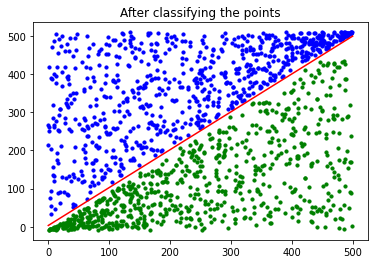

In [13]:

# Gradient Decent Algorithm
while(Loss_ZeroOne(data,labels,N,w)!=0):
    for j in range(0,N):
        grad=GradientOfLossFunction(w,data,N,labels,j)
        w[0]=w[0]-grad[0]*lr
        w[1]=w[1]-grad[1]*lr
        w[2]=w[2]-grad[2]*lr

# plotting the graph with datapoints and the classifier
x=dataP[:,0]
y=dataP[:,1]
plt.scatter(x,y,color='green',s=10)
x=dataN[:,0]
y=dataN[:,1]
plt.scatter(x,y,color='blue',s=10)
x=np.linspace(min,max,1000)
y=-(x*w[0]+w[2])/w[1]
plt.plot(x,y,color='red')
plt.title("After classifying the points")
plt.show()

question 3

Dataset creation and plotting (non linearly separable 2D data)

(3000,)
(1500, 2)


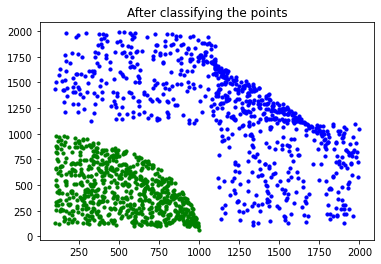

0


In [24]:
# Here we are using 3 neurons in the hidden layer
# we are using 3  neurons in the input layer
# two inputs correspond to data point, and other corresponding to the bias
# w1 is weight[w1[:-1]] and bias[w1[2]] in between hidden and input layer 
# Dataset creation
N=1500
offset=8
data=np.zeros(N*2)
dataP=[]
dataN=[]
data=data.reshape(N, 2)
labels=np.zeros(N)

# r1,r2,r3,r4 are variables used to generate the data points
r1=100
r2=1000
r3=1100
r4=2000

for i in range(0,N):
    lab=np.floor(2*np.random.rand())
    x=0
    y=0
    if(lab==0):
        x=(int)(r1+(r2-r1)*(np.random.rand()))
        maxi_Y=np.sqrt(r2*r2-x*x)
        y=(int)(r1+(maxi_Y-r1)*np.random.rand())
        data[i][1]=y
        labels[i]=1
        dataP.append([x,y])
    else:
        
        randIt=np.floor(2*np.random.rand())
        if(randIt==1):
            x=(int)(r1+(r4-r1)*(np.random.rand()))
            data[i][0]=x
            maxi_Y=np.sqrt(r4*r4-x*x)
            y=(int)(r3+(maxi_Y-r3)*np.random.rand())
        elif(randIt==0):
            y=(int)(r1+(r4-r1)*(np.random.rand()))
            
            maxi_X=np.sqrt(r4*r4-y*y)
            x=(int)(r3+(maxi_X-r3)*np.random.rand())
           
        data[i][0]=x
        data[i][1]=y
        labels[i]=-1
        dataN.append([x,y])

# plotting data :
# converting data to np-array
data=np.array(data)
# converting dataP to np-array
dataP=np.array(dataP)
# converting dataN to np-array
dataN=np.array(dataN)
x=dataP[:,0]
y=dataP[:,1]
plt.scatter(x,y,color='green',s=10)
x=dataN[:,0]
y=dataN[:,1]
plt.scatter(x,y,color='blue',s=10)
plt.title("Non Linearly Separable data")
plt.show()

Function that are being used in our MLP model, these are used for back porpagation using Gradient Descent

In [27]:

#  the ReLU activation function
# xj(1)=act(sj(1))
def ReLU(x):
    if(x>0):
        return x
    return 0

#  The Derivative of ReLU activation function
# d xj(1)/ d sj(1)
def ReLU_diff(x):
    if(x>0):
        return 1
    return 0
# Here we are using hinge loss
# The below function is used to calculate the hinge loss for the output of our NN, and the true label 
def loss_output(output,trueLabel):
    # dL / dx1(2) = (df / dx1(2) )*( dL / df )   
    if(output*trueLabel>1):
        return 0
    return (1-output*trueLabel)

# The below function is used to calculate the gradient of the loss function with respective to the output of our NN
# dL/dx1(2):
def diff_loss_output(output,trueLabel):
    # dL / dx1(2) = (df / dx1(2) )*( dL / df )   
    if(output*trueLabel>1):
        return 0
    return -trueLabel
    
# hidden layer to output layer
#  Here we are finding the gradient of loss with respective to the weights between hidden layer and the output layer 
# dL/dw1k(2) 
def GradientHiddenW_to_output(x1,f,k,output,trueLabel): 
    # dx1(2)/dwk(2)* dL/dx1(2)
    return x1[k] * diff_loss_output(output,trueLabel)


# dL/dxj(1)
def GradientHiddenx_to_output(w2,L,f,j,output,trueLabel):
    # dx1(2)/dxj(1)* dL/dx1(2)
    return w2[j] * diff_loss_output(output,trueLabel)


# dL/dwjk(1)
def GradientInputW_to_hidden(x0,w2,L,f,k,output,trueLabel,s,j):
    # dsj(1)/dwkj(1)*dxj(1)/dsj(1)* dx1(2)/dxj(1) * dL/dx1(2)
    return x0[k]* ReLU_diff(s[j]) * w2[j] *diff_loss_output(output,trueLabel)


In [29]:

lr=0.01
t=np.array([0.5,0.5,1,2,3,5,5,2,5])
w1 = t.reshape(3,3)
w2=np.array([2,3,2])
b2=0.5
x1=np.array([0,0,0])
s1=np.array([0,0,0])
for e in range(0,100):
    for i in range(0,int(N/2)):
        normalise=data[i][0]+data[i][1]
        x0=np.array([data[i][0]/normalise,data[i][1]/normalise,1])
        lst=np.matmul(w1,x0)
        for j in range(0,3):
            s1[j]=lst[j]
            x1[j]=ReLU(s1[j])
        x2=np.matmul(w2,x1)+b2
        output=x2
        f=x2
        for j in range (0,3):
            w2[j]= w2[j]+lr*GradientHiddenW_to_output(x1,f,j,output,labels[i])
        x_bias=[0]
        b2=b2+GradientHiddenW_to_output(x_bias,f,0,output,labels[i])
        for j in range (0,3):
            for k in range (0,3):
                w1[j][k]= w1[j][k]+lr*GradientInputW_to_hidden(x0,w2,L,f,k,output,labels[i],s1,j)




print("Solution for our NN,")
print("Wieghts and bias between input and th hidden layer is",w1[:-1],"and",<w1[2])
print("Wieghts between hidden layer and the  output is",w2)
print("Wieghts between hidden layer and the  output is",b2)

# testing:
# here we are testing with half of the data
# 7650 values
# misclassified is a variable to track the count of misclassified datapoints 
misclassified=0
for i in range(int(N/2),N):
      x0=np.array([data[i][0]/normalise,data[i][1]/normalise,1])
      lst=np.matmul(w1,x0)
      for j in range(0,3):
          s1[j]=lst[j]
          x1[j]=ReLU(s1[j])
      x2=np.matmul(w2,x1)+b2
      output=-1
      if(x2>0):
        output=1
      if(output!=labels[i]):
        misclassified+=1
print("The accuracy of our model is",(1-misclassified/int(N/2))*100)        

Solution for our NN,
Wieghts and bias between input and th hidden layer is [[3.64725443e+02 3.37034557e+02 7.01760000e+02]
 [1.18135317e+09 1.08273478e+09 2.26408795e+09]] [ 6474.14904752  5932.82095248 12404.97      ]
Wieghts between hidden layer and the  output is [       807 2751063133      15029]
Wieghts between hidden layer and the  output is 0.5
The accuracy of our model is 92.93333333333334
